## NVLab Summer School Assignment 1
Part II.

In [333]:
# from google.colab import drive
# drive.mount('/content/drive')

In [334]:
# !ls /content/drive/
# %cd "/content/drive/My Drive"
# %cd "HW1/resources"

# !ls

In [335]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
# import tensorflow as tf

# from google.colab.patches import cv2_imshow

A. Convolution Implementation

In [336]:
def my_conv(img, kernel):
    '''
    function: convolution

    img: (H*W*C) numpy array
    kernel: (K*K) numpy array
    output: (H*W*C) numpy array
    '''
    pad_size = kernel.shape[0]//2
    (height, width, channel) = img.shape
    # Zero-padding
    pad_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REPLICATE)
    # Convolution
    output_img = np.zeros(img.shape)
    for i in range(height):
        for j in range(width):
            for c in range(channel):
                output_img[i, j, c] = np.sum(pad_img[i:i+kernel.shape[0], j:j+kernel.shape[1], c] * kernel)
    
    return output_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


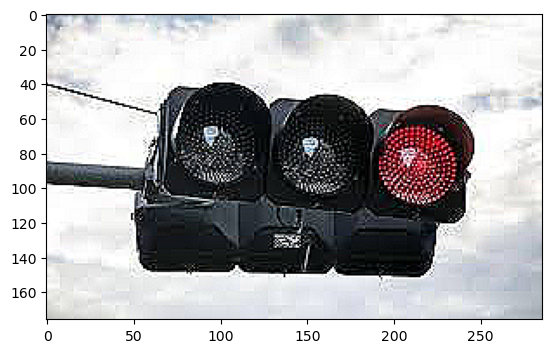

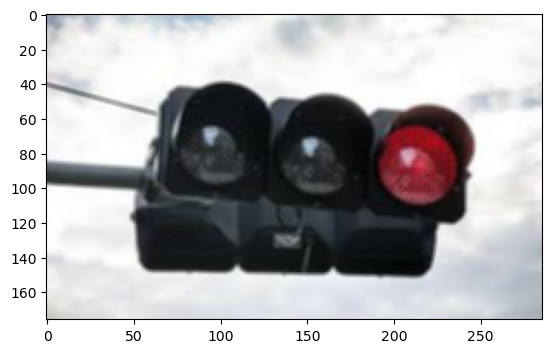

True

In [337]:
## read image from resource/
img = cv2.imread("resource/r1.jpg")
img = img.astype(np.float32)/255

## set kernel
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
boxblur_kernel = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

sharpen_img = my_conv(img, sharpen_kernel)
boxblur_img = my_conv(img, boxblur_kernel)

plt.imshow(cv2.cvtColor(sharpen_img.astype(np.float32), cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(boxblur_img.astype(np.float32), cv2.COLOR_BGR2RGB))
plt.show()

# image writing
image_path = "output/part2/sharpen.jpg"
folder_path = os.path.dirname(image_path)
os.makedirs(folder_path, exist_ok=True)
cv2.imwrite(image_path, 255*sharpen_img)

image_path = "output/part2/boxblur.jpg"
cv2.imwrite(image_path, 255*boxblur_img)

B. Hybrid Image

In [347]:
PAIR = 0
GAU_SIZE = 50
GAU_SIGMA = 10

## read image from resource/
l_img_list = ['dog', 'bicycle', 'bird', 'marilyn', 'fish']
h_img_list = ['cat', 'motorcycle', 'plane', 'einstein', 'submarine']

l_img = cv2.imread("resource/" + l_img_list[PAIR] + ".bmp")
h_img = cv2.imread("resource/" + h_img_list[PAIR] + ".bmp")

l_img = l_img.astype(np.float32)/255
h_img = h_img.astype(np.float32)/255

# change picture size
height_size = min(l_img.shape[0], h_img.shape[0])
width_size = min(l_img.shape[1], h_img.shape[1])
dsize = (width_size, height_size)

l_img = cv2.resize(l_img, dsize)
h_img = cv2.resize(h_img, dsize)

In [348]:
def my_GaussianBlur(size, sigma):
    '''
    function: gaussian blur kernel generating

    size: kernel size, should be an odd number
    sigma: standard deviation of gaussina distribution
    g: gaussian kernel
    '''
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    g = g/g.sum()
    return g

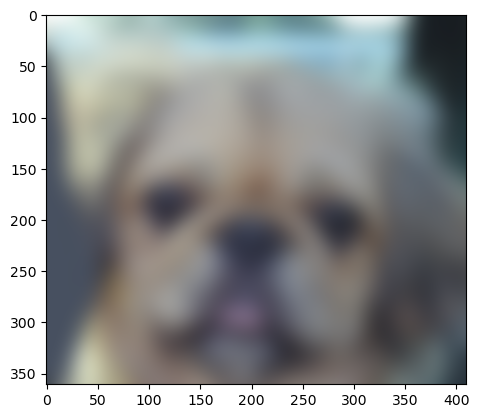

True

In [349]:
LPF_kernel = my_GaussianBlur(GAU_SIZE, GAU_SIGMA)
lpf_img = my_conv(l_img, LPF_kernel)

plt.imshow(cv2.cvtColor(lpf_img.astype(np.float32), cv2.COLOR_BGR2RGB))
plt.show()

lpf_path = "output/part2/lpf/" + l_img_list[PAIR] +"_SIZE:" + str(GAU_SIZE) + "_SIGMA:" + str(GAU_SIGMA) + ".jpg"
lpf_folder_path = os.path.dirname(lpf_path)
os.makedirs(lpf_folder_path, exist_ok=True)
cv2.imwrite(lpf_path, 255*lpf_img)

In [350]:
def normalize(img):
    ''' Function to normalize an input array to 0-1 '''
    img_min = img.min()
    img_max = img.max()
    scale = img_max - img_min
    return (img - img_min) / scale if not scale == 0 else img

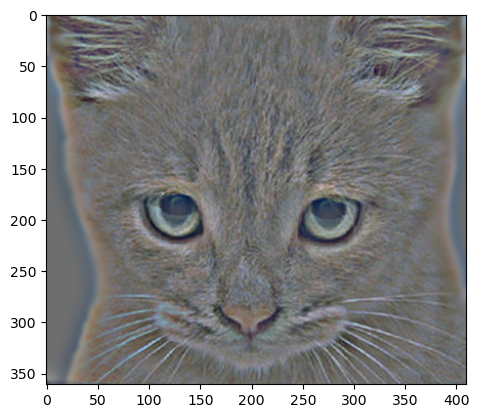

True

In [351]:
hpf_img = h_img - my_conv(h_img, LPF_kernel)

plt.imshow(normalize(cv2.cvtColor(hpf_img.astype(np.float32), cv2.COLOR_BGR2RGB) + .5))
plt.show()

hpf_path = "output/part2/hpf/" + h_img_list[PAIR] +"_SIZE:" + str(GAU_SIZE) + "_SIGMA:" + str(GAU_SIGMA) + ".jpg"

hpf_folder_path = os.path.dirname(hpf_path)
os.makedirs(hpf_folder_path, exist_ok=True)
cv2.imwrite(hpf_path, 255*hpf_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


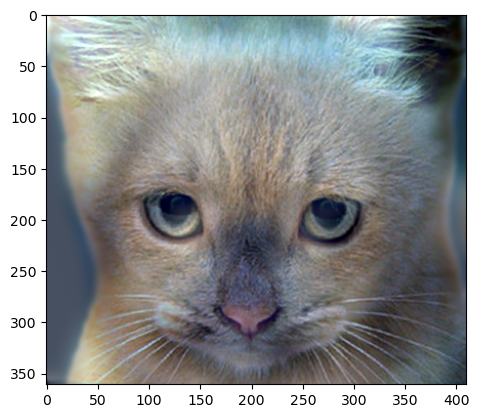

True

In [352]:
hybrid_img = lpf_img + hpf_img
plt.imshow(cv2.cvtColor(hybrid_img.astype(np.float32), cv2.COLOR_BGR2RGB))
plt.show()

hybrid_path = "output/part2/hybrid/" + h_img_list[PAIR] + "_" + l_img_list[PAIR] + "_SIZE:" + str(GAU_SIZE) + "_SIGMA:" + str(GAU_SIGMA) + ".jpg"

hybrid_folder_path = os.path.dirname(hybrid_path)
os.makedirs(hybrid_folder_path, exist_ok=True)
cv2.imwrite(hybrid_path, 255*hybrid_img)

In [353]:
# def sobel_filter(img):
#     sobelx_img = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
#     sobely_img = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)

#     sobel_img = cv2.addWeighted(sobelx_img, 0.5, sobely_img, 0.5, 0)
#     return sobel_img

In [354]:
# sobel_img = sobel_filter(h_img)
# plt.imshow(cv2.cvtColor(sobel_img, cv2.COLOR_BGR2RGB))
# plt.show()

In [355]:
# hybrid_img = cv2.addWeighted(lpf_img, 0.5, hpf_img, 0.5, 0)
# plt.imshow(cv2.cvtColor(hybrid_img.astype(np.float32), cv2.COLOR_BGR2RGB))
# plt.show()
